> # Neural Networks for Handwritten Digit Recognition, Multiclass 

## I- Packages

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid

import matplotlib.pyplot as plt
%matplotlib widget

## II- Softmax Function

$$a_j = \frac{e^{z_j}}{ \sum_{k=0}^{N-1}{e^{z_k} }} \tag{1}$$



In [4]:
def softmax(z):  
    ez = np.exp(z)
    a = ez/np.sum(ez)
    return a

## III - Neural Networks


### 1. load data

In [11]:
x_data = np.load("./data/digit/X.npy")
y_data = np.load("./data/digit/y.npy")

print(x_data.shape)
print(y_data.shape)

(5000, 400)
(5000, 1)


### 2. data vsualization

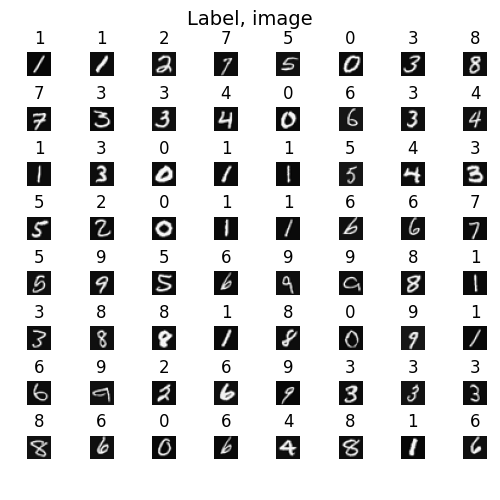

In [15]:
m, n = x_data.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)
fig
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = x_data[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y_data[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

## 3. Model

In [47]:
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [               
        tf.keras.layers.InputLayer((400,)),
        tf.keras.layers.Dense(25, activation="relu", name="L1"),
        tf.keras.layers.Dense(15, activation="relu", name="L2"),
        tf.keras.layers.Dense(10, activation="linear", name="L3")
    ], name = "my_model" 
)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

In [48]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 25)             │        10,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,575 (41.31 KB)

 Trainable params: 10,575 (41.31 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
[layer1, layer2, layer3] = model.layers

W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


### 3.2 traning

In [50]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    x_data,y_data,
    epochs=40
)

Epoch 1/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7972
Epoch 2/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6658
Epoch 3/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4518
Epoch 4/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3734
Epoch 5/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3295
Epoch 6/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2987
Epoch 7/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2746
Epoch 8/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2547
Epoch 9/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2379
Epoch 10/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2231
Epoch 11/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2098
Epoch 12/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1980
Epoch 13/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1870
Epoch 14/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1771
Epoch 15/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

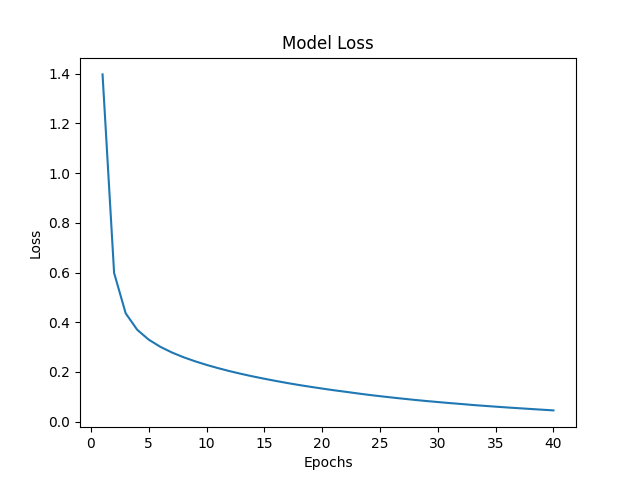

In [51]:
plt.figure()
x = list(range(1,41))
plt.plot(x,history.history['loss']) 
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()



### 3.3 prediction

In [55]:
image_of_two = x_data[1015]

pred = model.predict(image_of_two.reshape(1,400))

print(f" predicting a Two: \n{pred}")
print(f" Largest Prediction index: {np.argmax(pred)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
 predicting a Two: 
[[ -6.3981314   2.3685446   5.5109653   0.5979983 -10.54326    -3.340801
   -6.949462    1.7501843  -1.299002   -3.3324084]]
 Largest Prediction index: 2


### 3.4 Evaluation

In [56]:
# Acuracy

y_pred = model.predict(x_data)
y_pred = np.argmax(y_pred, axis=1).reshape((m,1))
accuracy = np.mean(y_pred == y_data)
print(f"Accuracy: {accuracy}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.9912


In [54]:
# save the model

model.save("digit_model.h5")